In [1]:
import os
os.chdir("../../..")

In [117]:
import json
import warnings
warnings.filterwarnings("ignore")


import numpy as np
import pandas as pd
from pprint import pprint

from grid2op.Parameters import Parameters

from oracle4grid.core.utils.constants import EnvConstants
from oracle4grid.core.utils.prepare_environment import prepare_env, get_initial_configuration
from oracle4grid.core.utils.actions_generator import init_plot_helper, plot_action, append_unitary_actions, format_sub_action_dict_for_g2op, format_line_action_dict_for_g2op

# 1 - Load Grid2op environment

In [123]:
# Your config
env_path = "data/rte_case14_realistic"
chronic = '000'
save_action_path = "oracle4grid/ressources/actions/rte_case14_realistic/test_unitary_actions_2.json"

In [124]:
constants=EnvConstants()
param = Parameters()
param.init_from_dict(constants.DICT_GAME_PARAMETERS_SIMULATION)
env = prepare_env(env_path, chronic, param)

INFO - An integer has been provided as chronic scenario - looking for the chronic folder in this position
INFO - the name of the loaded Grid2op scenario is : 000


# 2 - Visualize & Export desired actions

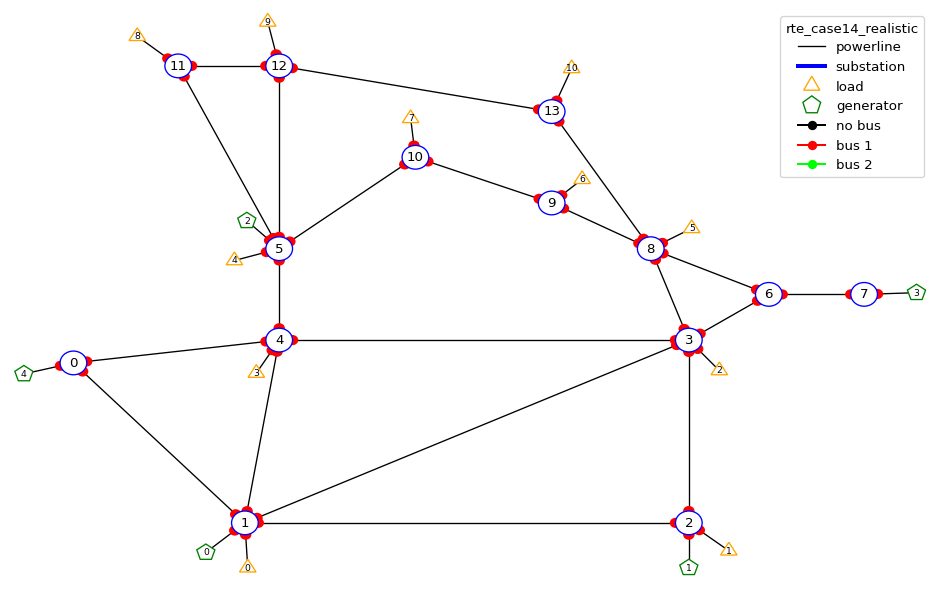

In [125]:
# Init
action_space = env.action_space
plot_helper = init_plot_helper(env, show = True)
init_topo_vect, init_line_status = get_initial_configuration(env)

Is ambigous??? -> False
Exception => []



c:\users\nmegel\.virtualenvs\oracle4grid-cak8mo3w\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  after removing the cwd from sys.path.


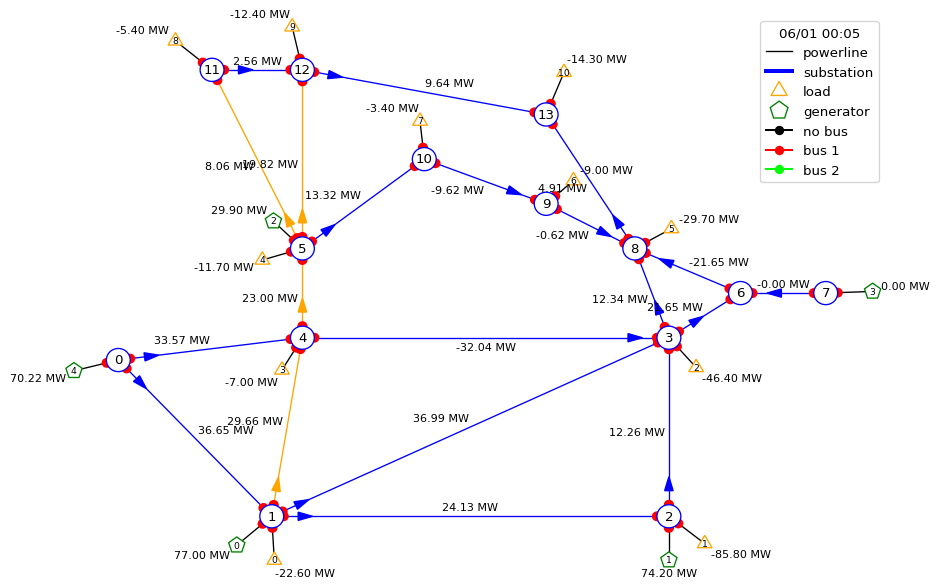

In [112]:
# Do-nothing
action_dict = {}
fig_obs = plot_action(env, plot_helper, action, line_info = 'p', load_info = 'p', gen_info = 'p')
fig_obs.show()

## A - Line id to be aware of

In [113]:
# To find lines
info_lines = {i:(l[0], l[1]) for i, l in enumerate(zip(env.line_or_to_subid, env.line_ex_to_subid))}
info_lines

{0: (0, 1),
 1: (0, 4),
 2: (1, 2),
 3: (1, 3),
 4: (1, 4),
 5: (2, 3),
 6: (3, 4),
 7: (5, 10),
 8: (5, 11),
 9: (5, 12),
 10: (8, 9),
 11: (8, 13),
 12: (9, 10),
 13: (11, 12),
 14: (12, 13),
 15: (3, 6),
 16: (3, 8),
 17: (4, 5),
 18: (6, 7),
 19: (8, 6)}

## B - Action definition example and plot - Substation

In [118]:
# Define your action manually (using line id)
sub_id =4
action_sub_4 = {sub_id: {"lines_id_bus": [(1, 2),(17,2)]}
             }
sub_id =5
action_sub_5 = {sub_id: {"lines_id_bus": [(17,2),(7,2)]}
             }

Is ambigous??? -> False
Exception => []



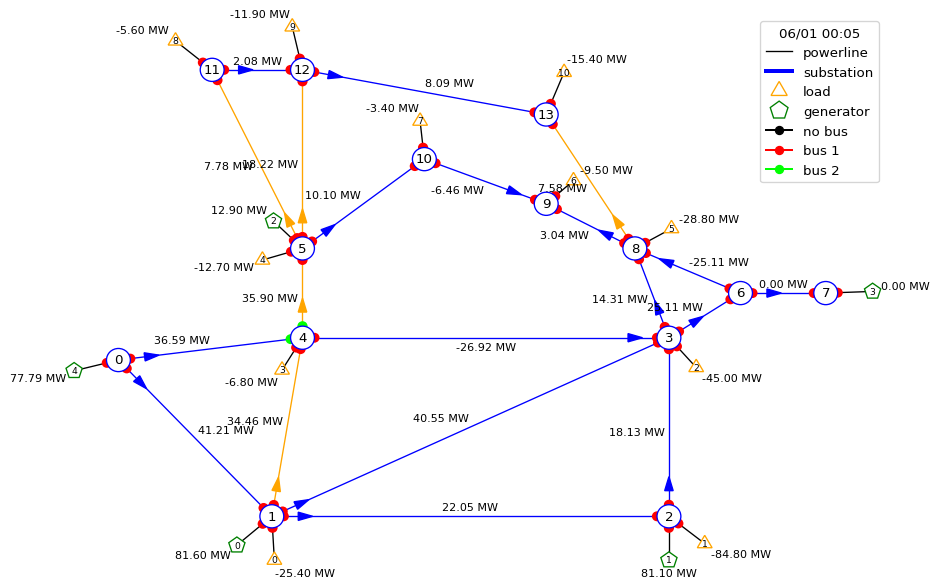

In [119]:
# grid2op simulation of the action
sub_state = format_sub_action_dict_for_g2op(action_sub_4, action_space)

# Plot state
fig_obs = plot_action(env, plot_helper, sub_state, line_info = 'p', load_info = 'p', gen_info = 'p')
fig_obs.show()

## C - Action definition example and plot - Line deconexion

In [67]:
# Define your action manually
line_id = 4
action_line_4 = {line_id: {"set_line": -1}}

Is ambigous??? -> False
Exception => []



c:\users\nmegel\.virtualenvs\oracle4grid-cak8mo3w\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  


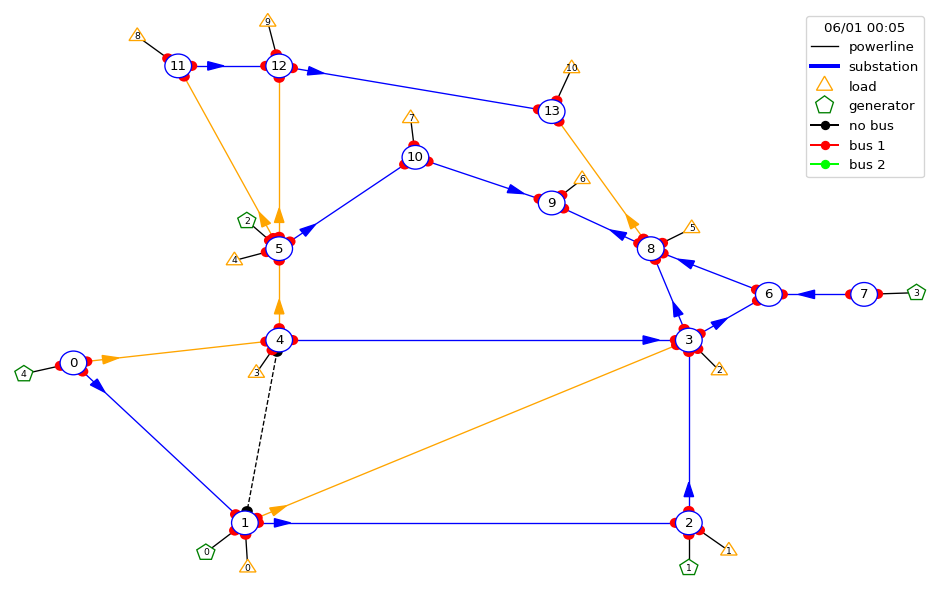

In [68]:
# grid2op simulation of the action
sub_state = format_line_action_dict_for_g2op(action_line_4)

# Plot state
fig_obs = plot_action(env, plot_helper, sub_state)
fig_obs.show()

## D - Edit your final unitary actions list

In [102]:
# Append to your desired unitary actions
states = {}
append_unitary_actions(states, 'sub_5', [action_sub_5])
append_unitary_actions(states, 'sub_4', [action_sub_4])
append_unitary_actions(states, 'line_4', [action_line_4])

# 3 - Final unitary actions

In [103]:
pprint(states)

{'line': {4: [{'set_line': -1}]},
 'sub': {4: [{'lines_id_bus': [(1, 2), (17, 2)]}],
         5: [{'lines_id_bus': [(17, 2), (7, 2)]}]}}


In [104]:
with open(save_action_path, 'w') as f:
    json.dump(states, f)